In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [ ]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [ ]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
datagen.fit(x_train)

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0,2))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=10
batch_size=64

In [ ]:
if x_test.shape[0] == y_test.shape[0]:
    print("Data shapes are consistent.")
else:
    print("Data shapes are inconsistent. Adjust your data loading/preprocessing.")

Data shapes are consistent.


In [152]:
history=model.fit(datagen.flow(x_train,y_train,batch_size=batch_size),
                  steps_per_epoch=len(x_train)//batch_size,
                  epochs=epochs,
                  validation_data=(x_test,y_test)
                  )

Epoch 1/10
781/781 [==============================] - 107s 137ms/step - loss: 0.8351 - accuracy: 0.7073 - val_loss: 0.7834 - val_accuracy: 0.7357
Epoch 2/10
781/781 [==============================] - 94s 121ms/step - loss: 0.8245 - accuracy: 0.7127 - val_loss: 0.8403 - val_accuracy: 0.7197
Epoch 3/10
781/781 [==============================] - 96s 123ms/step - loss: 0.8051 - accuracy: 0.7201 - val_loss: 0.7778 - val_accuracy: 0.7366
Epoch 4/10
781/781 [==============================] - 96s 122ms/step - loss: 0.7912 - accuracy: 0.7231 - val_loss: 0.7868 - val_accuracy: 0.7322
Epoch 5/10
781/781 [==============================] - 95s 122ms/step - loss: 0.7882 - accuracy: 0.7237 - val_loss: 0.8648 - val_accuracy: 0.7083
Epoch 6/10
781/781 [==============================] - 95s 121ms/step - loss: 0.7877 - accuracy: 0.7255 - val_loss: 0.8261 - val_accuracy: 0.7228
Epoch 7/10
781/781 [==============================] - 91s 117ms/step - loss: 0.7702 - accuracy: 0.7291 - val_loss: 0.7349 - val_a

In [153]:
test_loss,test_accuracy=model.evaluate(x_test,y_test,verbose=2)

313/313 - 5s - loss: 0.7392 - accuracy: 0.7505 - 5s/epoch - 16ms/step


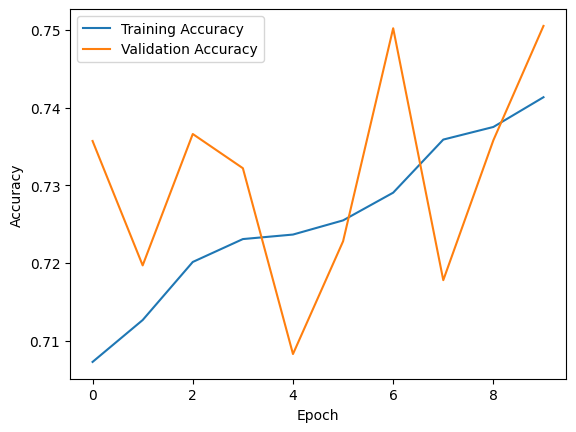

In [154]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

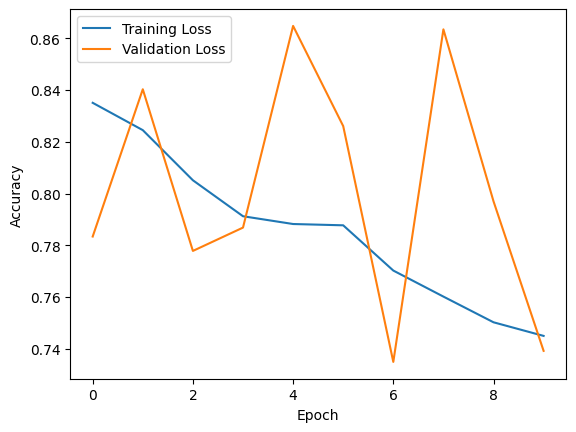

In [155]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [157]:
num_samples=5
random_indices=np.random.randint(0,len(x_test),num_samples)
random_images=x_test[random_indices]

In [158]:
predictions=model.predict(random_images)

1/1 [==============================] - 0s 126ms/step


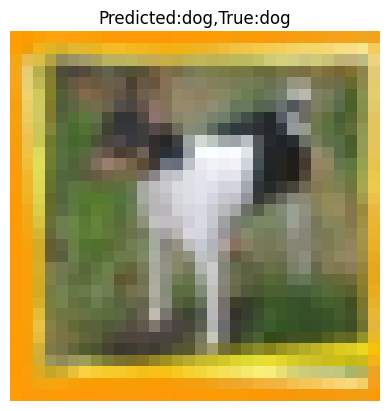

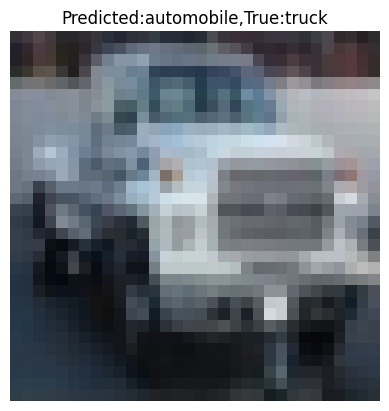

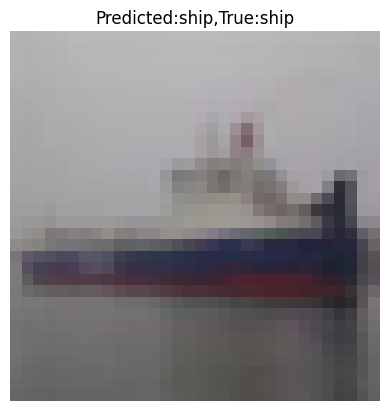

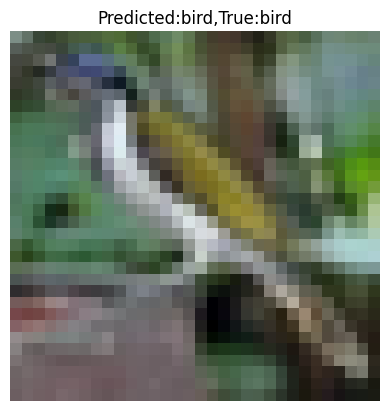

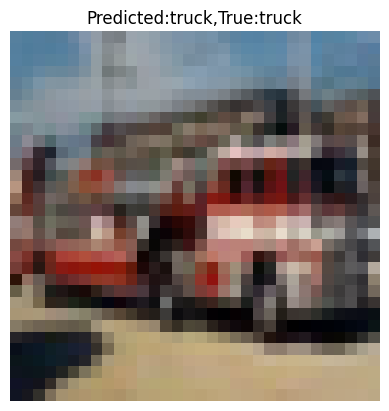

In [159]:
for i in range(num_samples):
  plt.imshow(random_images[i])
  plt.title(f"Predicted:{class_names[np.argmax(predictions[i])]},True:{class_names[np.argmax(y_test[random_indices[i]])]}")
  plt.axis('off')
  plt.show()